In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

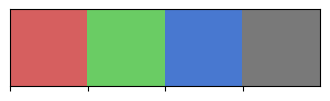

In [22]:
blue = sns.color_palette("muted")[0]
green = sns.color_palette("muted")[2]
red = sns.color_palette("muted")[3]
gray = sns.color_palette("muted")[7]

sns.palplot([red, green , blue, gray])

# Nico Ref

In [23]:
orientacion = ['1h','2h','3h']
ref = {}
for at in ['Ridge', 'Facet', 'Valley']:
    ref[at]={}
    for orient in orientacion:
        ref[at][orient] = []

ref['Ridge']['1h'].append( np.array([6.84, 6.34, 5.84, 5.34, 4.84, 4.34, 3.84]))
ref['Ridge']['1h'].append( np.array([-155.82818,  -155.85302,  -155.88392,  -155.9206,  -155.95299,  -155.92032,  -155.32236]))
ref['Facet']['1h'].append( np.array([6.34,  5.84,  5.34,  4.84,  4.34,  3.84,  3.34]))
ref['Facet']['1h'].append( np.array([-155.84025, -155.86952, -155.90453, -155.94402, -155.97414, -155.94739, -155.75032]))
ref['Valley']['1h'].append(np.array([5.34 , 4.84 , 4.34 , 3.84 , 3.34 , 2.84 , 2.34 ]))
ref['Valley']['1h'].append(np.array([-155.88517, -155.92829, -155.97947, -156.03271, -156.06477, -156.0064, -155.70046]))
ref['Ridge']['2h'].append( np.array([6.84,  6.34,  5.84,  5.34,  4.84,  4.34,  3.84]))
ref['Ridge']['2h'].append( np.array([-155.82662, -155.85167, -155.88333, -155.92092, -155.9541, -155.93698, -155.73677]))
ref['Facet']['2h'].append( np.array([6.34,  5.84,  5.34,  4.84,  4.34,  3.84,  3.34]))
ref['Facet']['2h'].append( np.array([-155.83883, -155.86842, -155.9052, -155.94816, -155.98654, -155.98005, -155.82029]))
ref['Valley']['2h'].append(np.array([5.34,   4.84,   4.34,   3.84,   3.34,   2.84,   2.34]))
ref['Valley']['2h'].append(np.array([-155.88322, -155.92744, -155.98207, -156.04102, -156.08576, -156.05676, -155.80797]))
ref['Ridge']['3h'].append( np.array([6.84, 6.34, 5.84, 5.34, 4.84, 4.34, 3.84 ]))
ref['Ridge']['3h'].append( np.array([-155.82519, -155.84964, -155.8819, -155.92201, -155.96017, -155.95613, -155.7673]))
ref['Facet']['3h'].append( np.array([6.34, 5.84, 5.34, 4.84, 4.34, 3.84, 3.34 ]))
ref['Facet']['3h'].append( np.array([-155.8377, -155.8671, -155.90426, -155.94834, -155.98917, -155.98593, -155.82584]))
ref['Valley']['3h'].append(np.array([5.34, 4.84, 4.34, 3.84, 3.34, 2.84, 2.34 ]))
ref['Valley']['3h'].append(np.array([-155.88395, -155.92845, -155.98305, -156.04141, -156.08148, -156.04353, -155.77386]))


In [24]:
for at in ['Ridge', 'Facet', 'Valley']:
    for orient in ['1h','2h','3h']:
        ref[at][orient][1] =  ref[at][orient][1] + 155.82150402

In [25]:

df = pd.read_csv('zonesvdw/ZvsE_H1_Ridge.dat', delim_whitespace='\t')
Z = df['Z']
Z.values

array([20.33408   , 20.16741333, 20.00074667, 19.83408   , 19.66741333,
       19.50074667, 19.33408   , 19.16741333, 19.00074667, 18.83408   ,
       18.66741333, 18.50074667, 18.33408   , 18.16741333, 18.00074667,
       17.83408   , 17.66741333, 17.50074667, 17.33408   , 17.16741333,
       17.00074667, 16.83408   , 16.66741333, 16.50074667, 16.33408   ,
       16.16741333, 16.00074667, 15.83408   , 15.66741333, 15.50074667,
       15.33408   , 15.16741333, 15.00074667, 14.83408   , 14.66741333,
       14.50074667, 14.33408   ])

In [26]:
DFT = {}
files = ['H1_Facet.dat', 'H1_Ridge.dat', 'H1_Valley.dat', 'H2_Facet.dat', 'H2_Ridge.dat', 'H2_Valley.dat', 'H3_Facet.dat', 'H3_Ridge.dat', 'H3_Valley.dat']
for file in files:
    df_DFT = pd.read_csv(f'calculos_hasta_z-12_DFT/{file}', delim_whitespace=True , header=None)
    df_DFT = df_DFT[4]
    DFT[file] = df_DFT
    DFT[file].columns = ['E_DFT']
    DFT[file] = pd.concat([df['Z'],DFT[file]] , axis=1)


# Funciones utiles

In [38]:
E_ref = - 155.82150402
#- 155.846302046531
Z = {
    'Ridge'  : 11.12870299,
    'Facet'  : 11.12870299,#9.96601945,
    'Valley' : 11.12870299#8.76984557
    }
paleta = {
    'Facet'  : '#93B868',
    'Ridge'  : '#DDE392',
    'Valley' : '#74795B'
    }

def plot_zone1(PATH,ax):
    df = pd.read_csv(PATH, delim_whitespace='\t')
    df['E'] = df['E_ann'] - E_ref 
    # if PATH[17:-4] == 'Valley':
    #     color = '#74795B'
    # elif PATH[17:-4] == 'Facet':
    #     color = '#93B868'
    # elif PATH[17:-4] == 'Ridge':
    #     color = '#DDE392'
    df.plot(x='Z',y='E', marker='o',ax=ax, alpha=0.9,label=PATH[17:-4])
    ax.set_title(PATH[14:-4].replace('_', ' '))
    ax.set_xlabel(f'Distancia en el eje Z [$\AA$]')
    ax.set_ylabel('$V^{ANN}$-$V^{ref}$ [eV]')
    return ax

#+ 155.82150402
def plot_zone2(PATH,ax, H ='H1', orientacion=None):
    df = pd.read_csv(PATH, delim_whitespace='\t')
    df['E'] = df['E_ann'] - E_ref
    kind = PATH[17:-4]
    df['Z_ref'] = df['Z'] - Z[kind] 
    df.query('E<0.5').plot(x='Z_ref',y='E', marker='o',ax=ax, color=paleta[kind], alpha=0.9,label=kind)
    # ax.scatter( df.Z_ref, DFT[f'{H}_{kind}.dat'] , color='black', marker='s', label = f'{kind} DFT')
    ax.set_title(PATH[17:-4].replace('_', ' '))
    ax.set_xlabel(f'Distancia en el eje Z [$\AA$]')
    ax.set_ylabel('$V^{ANN}$-$V^{ref}$ [eV]')
    return ax

# H1

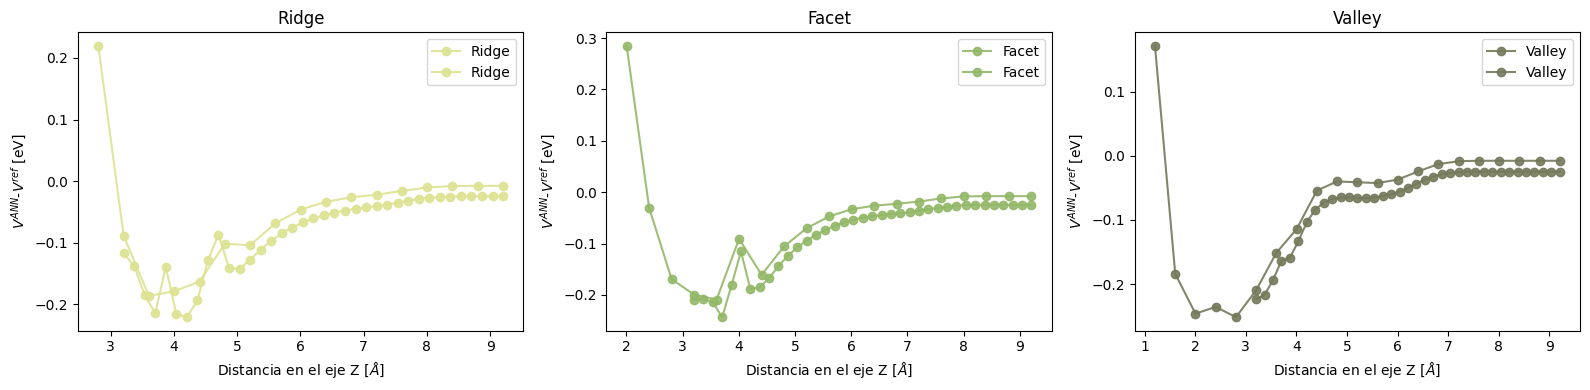

In [39]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('zonesvdw/ZvsE_H1_Ridge.dat', ax[0])
ax[1] = plot_zone2('zonesvdw/ZvsE_H1_Facet.dat', ax[1])
ax[2] = plot_zone2('zonesvdw/ZvsE_H1_Valley.dat', ax[2])


ax[0] = plot_zone2('predsvdw/ZvsE_H1_Ridge.dat', ax[0])
ax[1] = plot_zone2('predsvdw/ZvsE_H1_Facet.dat', ax[1])
ax[2] = plot_zone2('predsvdw/ZvsE_H1_Valley.dat', ax[2])
# ax[0].plot( ref['Ridge'][orientacion[0]][0],ref['Ridge'][orientacion[0]][1] , marker='v', label ='Ridge')
# ax[1].plot( ref['Facet'][orientacion[0]][0],ref['Facet'][orientacion[0]][1] , marker='v', label ='Facet')
# ax[2].plot(ref['Valley'][orientacion[0]][0],ref['Valley'][orientacion[0]][1], marker='v', label ='Valley')
# ax[0].axhline(y=- 155.82150402, color='blue', linestyle='--', label = 'ref DFT')
# ax[1].axhline(y=- 155.82150402, color='blue', linestyle='--', label = 'ref DFT')
# ax[2].axhline(y=- 155.82150402, color='blue', linestyle='--', label = 'ref DFT')
# ax[0].axhline(y= - 155.846302046531, color='red', linestyle='--', label = 'ref ANN')
# ax[1].axhline(y= - 155.846302046531, color='red', linestyle='--', label = 'ref ANN')
# ax[2].axhline(y= - 155.846302046531, color='red', linestyle='--', label = 'ref ANN')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.tight_layout()
plt.show()

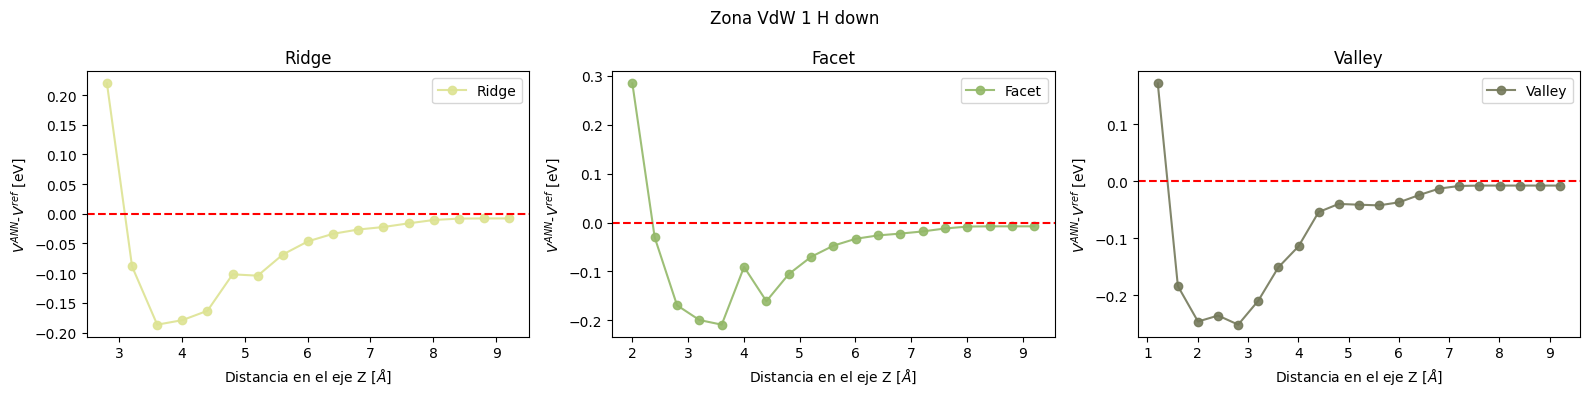

In [40]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('predsvdw/ZvsE_H1_Ridge.dat', ax[0])
ax[1] = plot_zone2('predsvdw/ZvsE_H1_Facet.dat', ax[1])
ax[2] = plot_zone2('predsvdw/ZvsE_H1_Valley.dat', ax[2])



ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
# ax[0].plot( ref['Ridge'][orientacion[0]][0],ref['Ridge'][orientacion[0]][1] , marker='v', label ='Ridge')
# ax[1].plot( ref['Facet'][orientacion[0]][0],ref['Facet'][orientacion[0]][1] , marker='v', label ='Facet')
# ax[2].plot(ref['Valley'][orientacion[0]][0],ref['Valley'][orientacion[0]][1], marker='v', label ='Valley')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.suptitle('Zona VdW 1 H down')
fig.tight_layout()
plt.show()

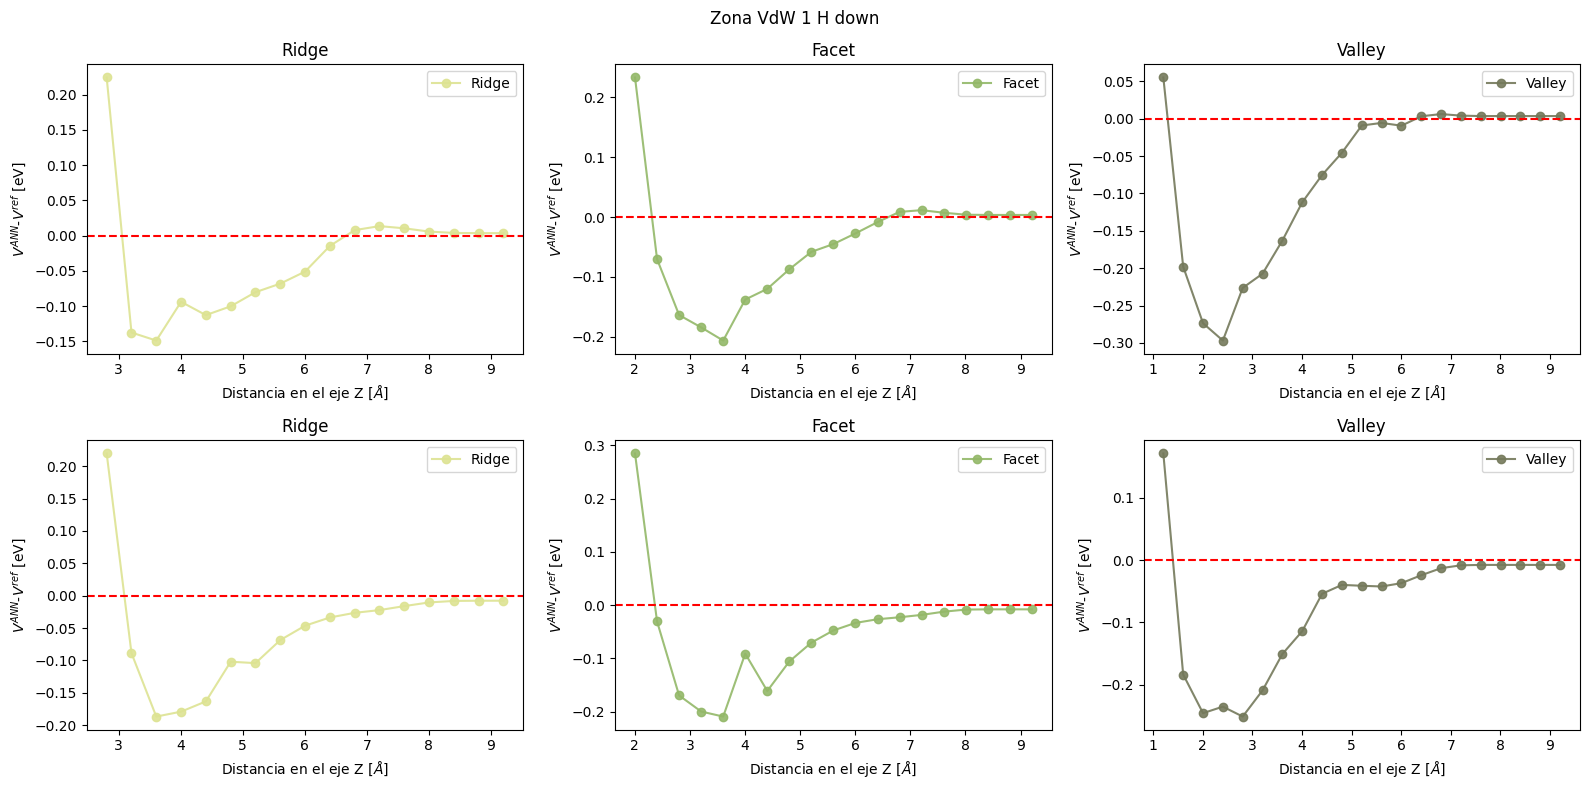

In [41]:
fig,ax = plt.subplots(2,3, figsize=(16,8))
ax[0,0] = plot_zone2('pred_ini/ZvsE_H1_Ridge.dat',  ax[0,0])
ax[0,1] = plot_zone2('pred_ini/ZvsE_H1_Facet.dat',  ax[0,1])
ax[0,2] = plot_zone2('pred_ini/ZvsE_H1_Valley.dat', ax[0,2])


ax[0,0].axhline(y=0, color='red', linestyle='--')
ax[0,1].axhline(y=0, color='red', linestyle='--')
ax[0,2].axhline(y=0, color='red', linestyle='--')


ax[1,0] = plot_zone2('predsvdw/ZvsE_H1_Ridge.dat',  ax[1,0])
ax[1,1] = plot_zone2('predsvdw/ZvsE_H1_Facet.dat',  ax[1,1])
ax[1,2] = plot_zone2('predsvdw/ZvsE_H1_Valley.dat', ax[1,2])

ax[1,0].axhline(y=0, color='red', linestyle='--')
ax[1,1].axhline(y=0, color='red', linestyle='--')
ax[1,2].axhline(y=0, color='red', linestyle='--')

ax[0,0].legend()
ax[0,1].legend()
ax[0,2].legend()
fig.suptitle('Zona VdW 1 H down')
fig.tight_layout()
plt.show()

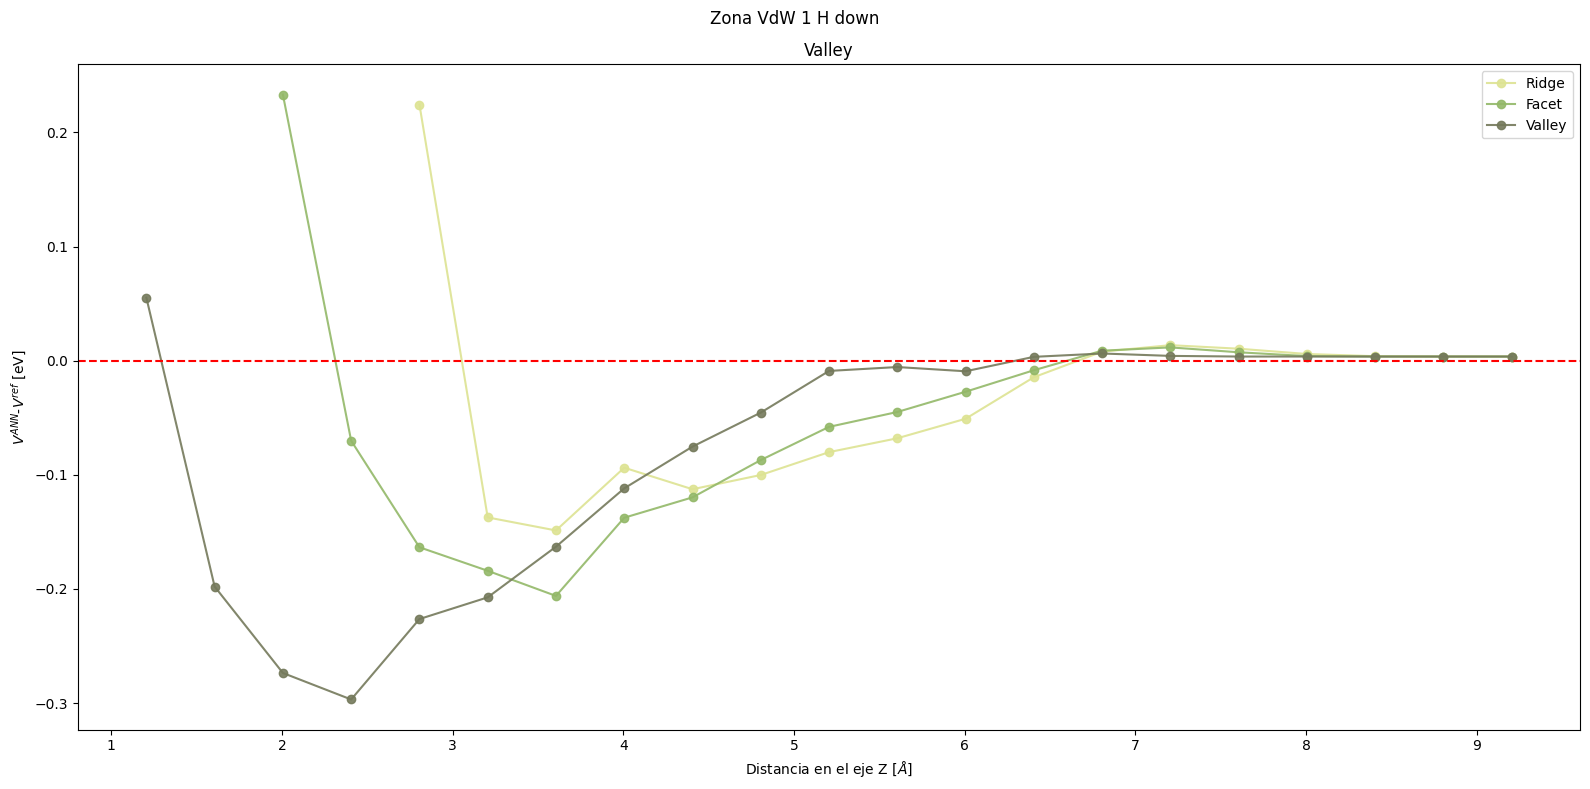

In [42]:
fig,ax = plt.subplots( figsize=(16,8))
plot_zone2('pred_ini/ZvsE_H1_Ridge.dat', ax=ax)
plot_zone2('pred_ini/ZvsE_H1_Facet.dat', ax=ax)
plot_zone2('pred_ini/ZvsE_H1_Valley.dat', ax=ax)


ax.axhline(y=0, color='red', linestyle='--')


ax.legend()
fig.suptitle('Zona VdW 1 H down')
fig.tight_layout()
plt.show()

# H2

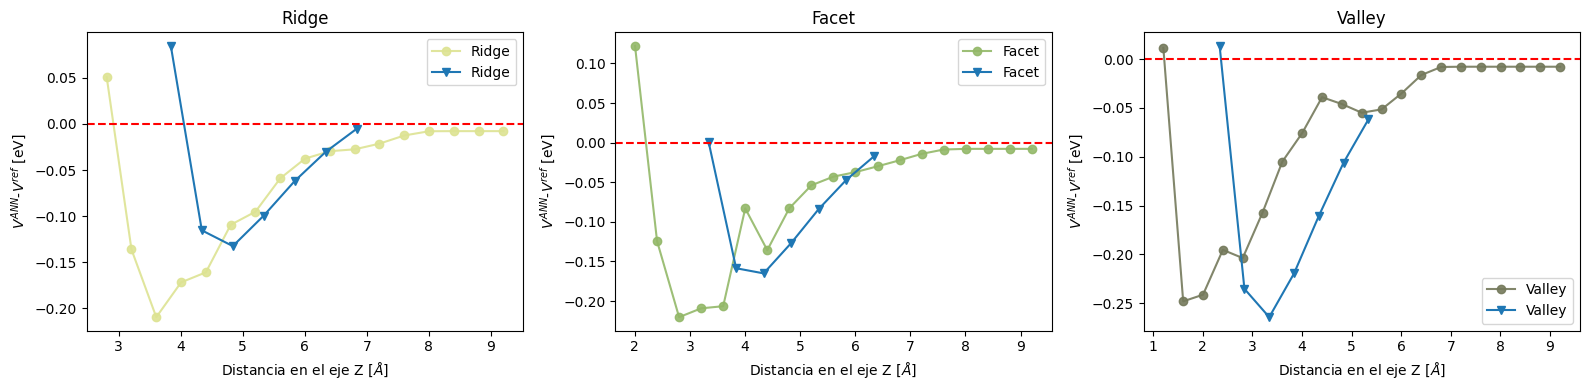

In [43]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('predsvdw/ZvsE_H2_Ridge.dat',  ax[0] , 'H2')
ax[1] = plot_zone2('predsvdw/ZvsE_H2_Facet.dat',  ax[1] , 'H2')
ax[2] = plot_zone2('predsvdw/ZvsE_H2_Valley.dat',  ax[2] , 'H2')

ax[0].plot( ref['Ridge'][orientacion[1]][0],ref['Ridge'][orientacion[1]][1] , marker='v', label ='Ridge')
ax[1].plot( ref['Facet'][orientacion[1]][0],ref['Facet'][orientacion[1]][1] , marker='v', label ='Facet')
ax[2].plot(ref['Valley'][orientacion[1]][0],ref['Valley'][orientacion[1]][1], marker='v', label ='Valley')

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.tight_layout()
plt.show()

# H3

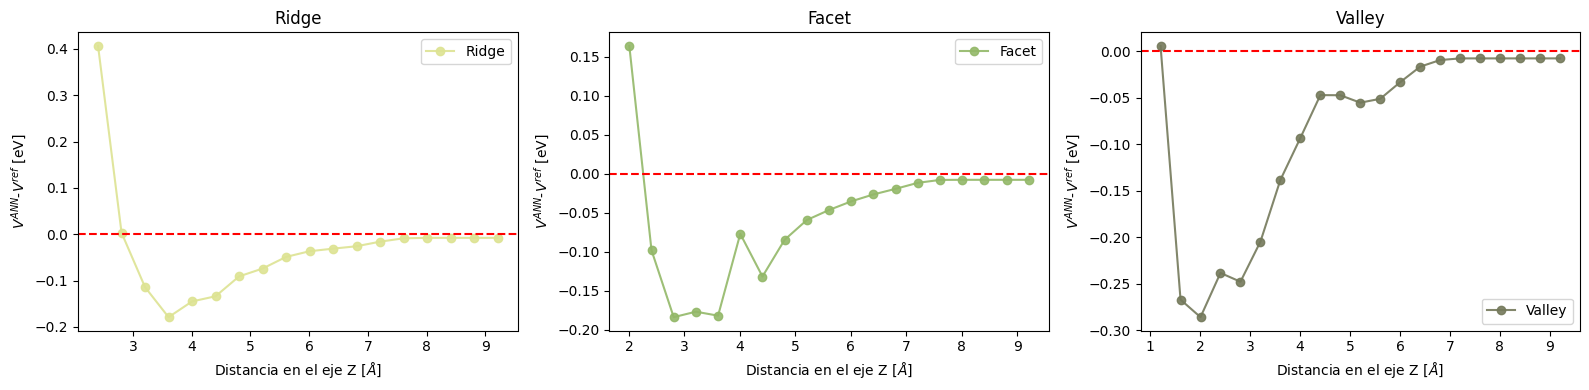

In [44]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('predsvdw/ZvsE_H3_Ridge.dat', ax[0] , 'H3')
ax[1] = plot_zone2('predsvdw/ZvsE_H3_Facet.dat', ax[1] , 'H3')
ax[2] = plot_zone2('predsvdw/ZvsE_H3_Valley.dat', ax[2], 'H3')

# ax[0].plot( ref['Ridge'][orientacion[2]][0],ref['Ridge'][orientacion[2]][1] , marker='v', label ='Ridge DFT')
# ax[1].plot( ref['Facet'][orientacion[2]][0],ref['Facet'][orientacion[2]][1] , marker='v', label ='Facet DFT')
# ax[2].plot(ref['Valley'][orientacion[2]][0],ref['Valley'][orientacion[2]][1], marker='v', label ='Valley DFT')
ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.tight_layout()
plt.show()

# superpuestos

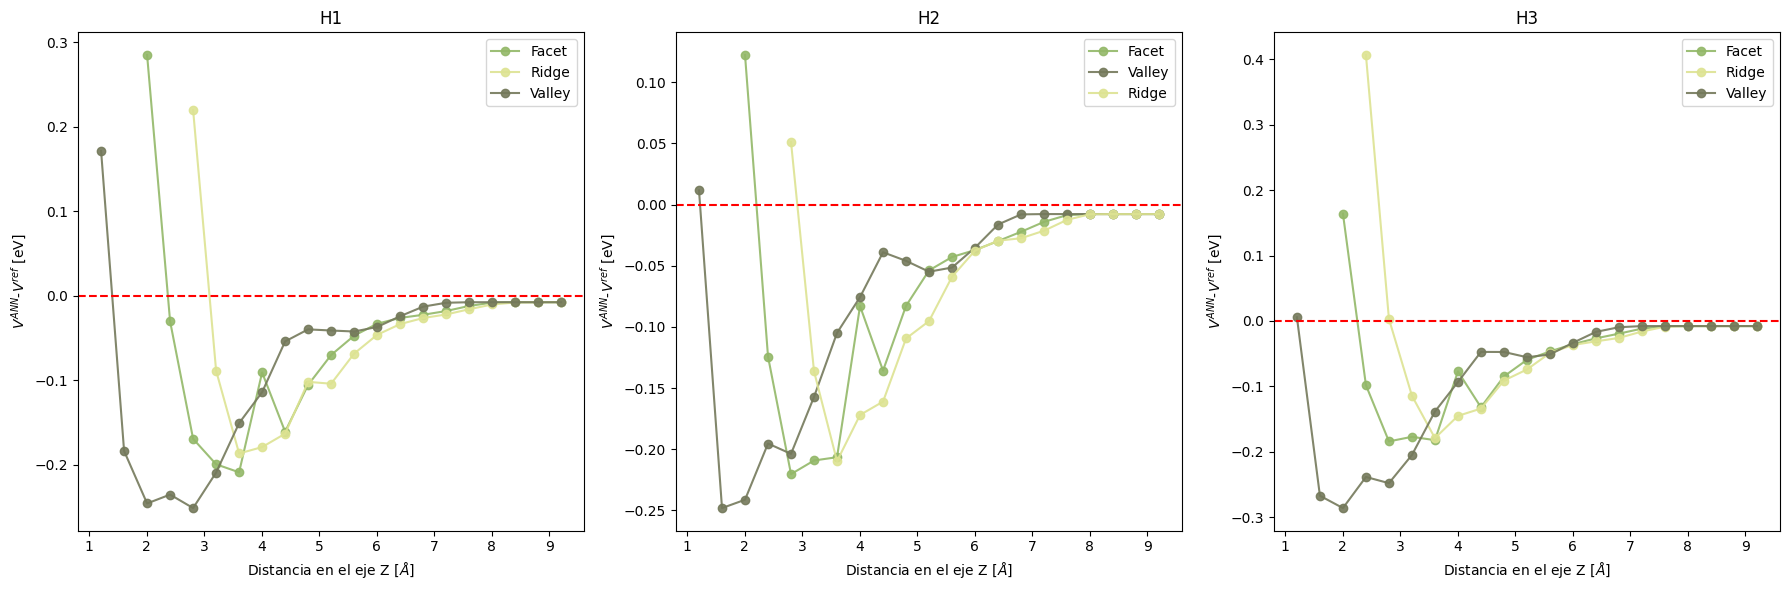

In [45]:
fig,ax = plt.subplots(1,3, figsize=(18,6))
ax[0] = plot_zone2('predsvdw/ZvsE_H1_Facet.dat' , ax[0])
ax[0] = plot_zone2('predsvdw/ZvsE_H1_Ridge.dat' , ax[0])
ax[0] = plot_zone2('predsvdw/ZvsE_H1_Valley.dat', ax[0])
ax[1] = plot_zone2('predsvdw/ZvsE_H2_Facet.dat' , ax[1])
ax[1] = plot_zone2('predsvdw/ZvsE_H2_Valley.dat', ax[1])
ax[1] = plot_zone2('predsvdw/ZvsE_H2_Ridge.dat' , ax[1])
ax[2] = plot_zone2('predsvdw/ZvsE_H3_Facet.dat' , ax[2])
ax[2] = plot_zone2('predsvdw/ZvsE_H3_Ridge.dat' , ax[2])
ax[2] = plot_zone2('predsvdw/ZvsE_H3_Valley.dat', ax[2])

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].set_title('H1')
ax[1].set_title('H2')
ax[2].set_title('H3')
fig.tight_layout()
plt.show()

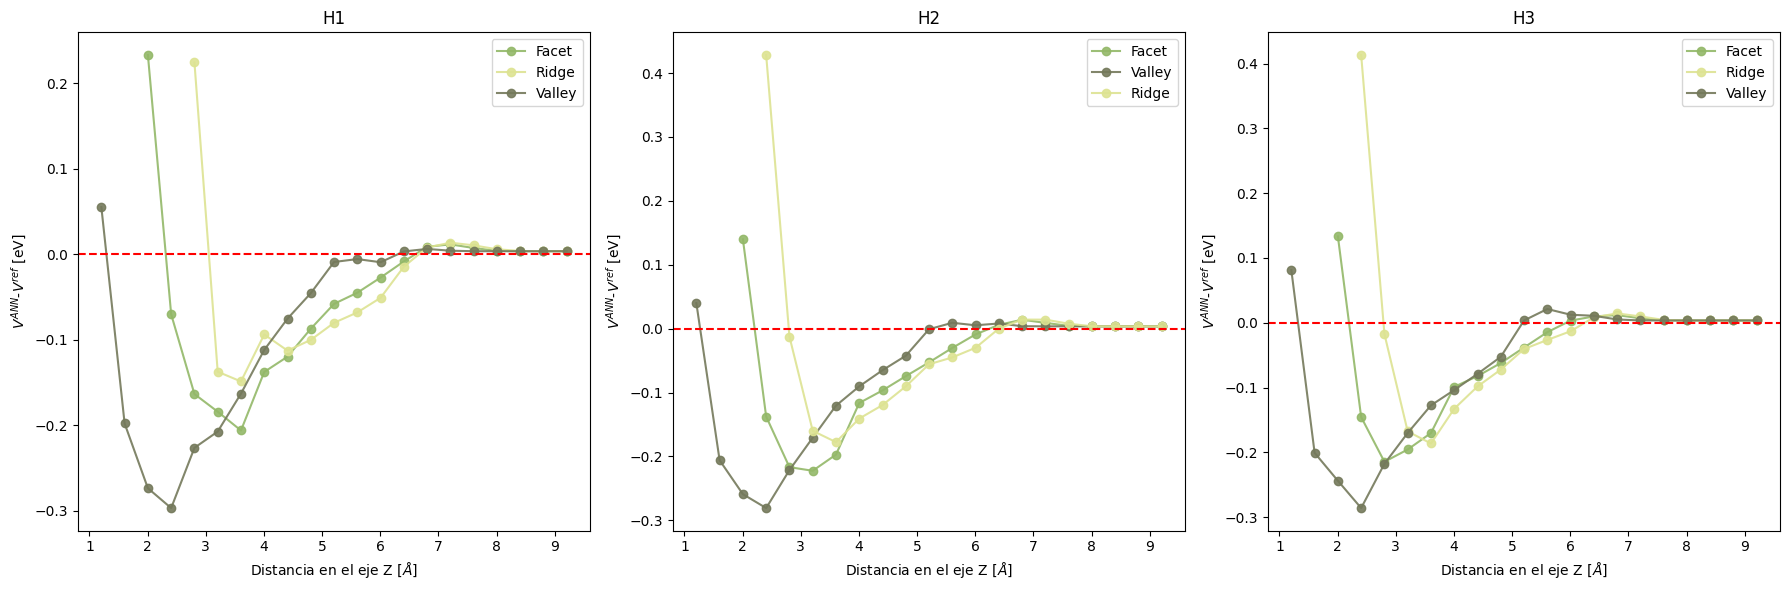

In [35]:
fig,ax = plt.subplots(1,3, figsize=(18,6))
ax[0] = plot_zone2('pred_ini/ZvsE_H1_Facet.dat' , ax[0])
ax[0] = plot_zone2('pred_ini/ZvsE_H1_Ridge.dat' , ax[0])
ax[0] = plot_zone2('pred_ini/ZvsE_H1_Valley.dat', ax[0])
ax[1] = plot_zone2('pred_ini/ZvsE_H2_Facet.dat' , ax[1])
ax[1] = plot_zone2('pred_ini/ZvsE_H2_Valley.dat', ax[1])
ax[1] = plot_zone2('pred_ini/ZvsE_H2_Ridge.dat' , ax[1])
ax[2] = plot_zone2('pred_ini/ZvsE_H3_Facet.dat' , ax[2])
ax[2] = plot_zone2('pred_ini/ZvsE_H3_Ridge.dat' , ax[2])
ax[2] = plot_zone2('pred_ini/ZvsE_H3_Valley.dat', ax[2])

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].set_title('H1')
ax[1].set_title('H2')
ax[2].set_title('H3')
fig.tight_layout()
plt.show()

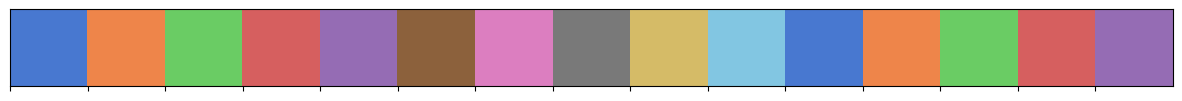

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtén la paleta "muted" de Seaborn
muted_palette = sns.color_palette("muted", n_colors=15)

# Muestra los colores de la paleta
sns.palplot(muted_palette)

# Muestra la paleta
plt.show()
